In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv("BDSuicidios2.csv")
df.head()

,Text
0,Ex Wife Threatening SuicideRecently I left my ...
1,i need helpjust help me im crying so hard
2,Honetly idkI dont know what im even doing here...
3,My life is over at 20 years oldHello all. I am...
4,Can you imagine getting old? Me neither.Wrinkl...


In [3]:
df.shape

(116014, 1)

In [4]:
N=115500
dataset = df.iloc[:-N , :]
dataset.shape

(514, 1)

In [5]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
dataset['Cleaned Posts'] = dataset['Text'].apply(clean)
dataset.head()

C:\Users\gueva\AppData\Local\Temp/ipykernel_8352/4068471738.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cleaned Posts'] = dataset['Text'].apply(clean)


,Text,Cleaned Posts
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently I left my ...
1,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know what im even doing here...
3,My life is over at 20 years oldHello all. I am...,My life is over at years oldHello all I am a y...
4,Can you imagine getting old? Me neither.Wrinkl...,Can you imagine getting old Me neither Wrinkle...


In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(Text):
    tags = pos_tag(word_tokenize(Text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

dataset['POS tagged'] = dataset['Cleaned Posts'].apply(token_stop_pos)
dataset.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\gueva\AppData\Local\Temp/ipykernel_8352/3235050926.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,Text,Cleaned Posts,POS tagged
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently I left my ...,"[(Ex, n), (Wife, n), (Threatening, n), (Suicid..."
1,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,"[(need, v), (helpjust, n), (help, v), (im, v),..."
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know what im even doing here...,"[(Honetly, r), (idkI, a), (dont, n), (know, v)..."
3,My life is over at 20 years oldHello all. I am...,My life is over at years oldHello all I am a y...,"[(life, n), (years, n), (oldHello, None), (yea..."
4,Can you imagine getting old? Me neither.Wrinkl...,Can you imagine getting old Me neither Wrinkle...,"[(imagine, v), (getting, v), (old, a), (neithe..."


In [7]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)
dataset.head()

C:\Users\gueva\AppData\Local\Temp/ipykernel_8352/3337248100.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lemma'] = dataset['POS tagged'].apply(lemmatize)


,Text,Cleaned Posts,POS tagged,Lemma
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently I left my ...,"[(Ex, n), (Wife, n), (Threatening, n), (Suicid...",Ex Wife Threatening SuicideRecently leave wi...
1,i need helpjust help me im crying so hard,i need helpjust help me im crying so hard,"[(need, v), (helpjust, n), (help, v), (im, v),...",need helpjust help im cry hard
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know what im even doing here...,"[(Honetly, r), (idkI, a), (dont, n), (know, v)...",Honetly idkI dont know im even feel like not...
3,My life is over at 20 years oldHello all. I am...,My life is over at years oldHello all I am a y...,"[(life, n), (years, n), (oldHello, None), (yea...",life year oldHello year old balding male hai...
4,Can you imagine getting old? Me neither.Wrinkl...,Can you imagine getting old Me neither Wrinkle...,"[(imagine, v), (getting, v), (old, a), (neithe...",imagine get old neither Wrinkles weight gain...


In [8]:
dataset[['Text', 'Lemma']]

,Text,Lemma
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...
1,i need helpjust help me im crying so hard,need helpjust help im cry hard
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...
...,...,...
509,I know what is after life and I want itI had a...,know life want itI NDE ATV accident remember...
510,The only reason I have not killed myself is be...,reason kill want selfish really want past ye...
511,Life is funny.You'll go through life. You'll f...,Life funny go life find happiness disappoint...
512,i'm losing all hope. it's not getting better. ...,lose hope get well quarantine ruin life frie...


### Análisis de sentimiento usando TextBlob

In [9]:
!pip install textblob
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
fin_data = pd.DataFrame(dataset[['Text', 'Lemma']])

In [11]:
#fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Text,Lemma,Polarity,Analysis
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...,0.144444,Positive
1,i need helpjust help me im crying so hard,need helpjust help im cry hard,-0.291667,Negative
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...,-0.155042,Negative
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...,-0.004563,Negative
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...,-0.053864,Negative


In [12]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Negative    249
Positive    239
Neutral      26
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x19ba639d460>,
 [Text(0.053764595406833066, 1.0986852908275142, 'Negative'),
  Text(-0.2269488812840825, -1.0763336867737177, 'Positive'),
  Text(1.3329897793361254, -0.21363110303845817, 'Neutral')],
 [Text(0.02932614294918167, 0.5992828859059168, '48.4%'),
  Text(-0.1237902988822268, -0.5870911018765732, '46.5%'),
  Text(0.8392898610634861, -0.13450847228347365, '5.1%')])

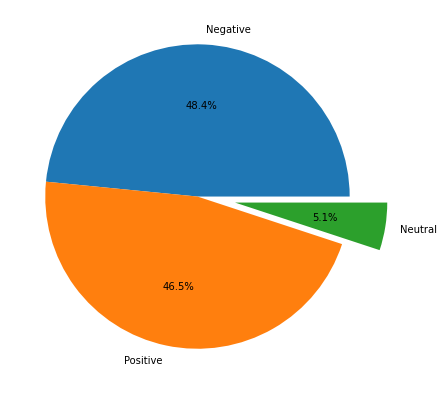

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

### Análisis de sentimiento usando VADER

In [14]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(post):
    vs = analyzer.polarity_scores(post)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [23]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.1:
        return 'Positive'
    elif compound <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()


,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...,0.144444,Positive,-0.9521,Negative
1,i need helpjust help me im crying so hard,need helpjust help im cry hard,-0.291667,Negative,-0.2023,Negative
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...,-0.155042,Negative,-0.9687,Negative
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...,-0.004563,Negative,0.3104,Positive
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...,-0.053864,Negative,-0.9021,Negative


In [24]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Negative    335
Positive    155
Neutral      24
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x19ba642c3d0>,
 [Text(-0.5047734105978062, 0.9773452838958495, 'Negative'),
  Text(0.3564999976289156, -1.0406285368423178, 'Positive'),
  Text(1.3355015694341332, -0.19732095184994264, 'Neutral')],
 [Text(-0.275330951235167, 0.5330974275795543, '65.2%'),
  Text(0.19445454416122668, -0.5676155655503551, '30.2%'),
  Text(0.8408713585326023, -0.12423911783144535, '4.7%')])

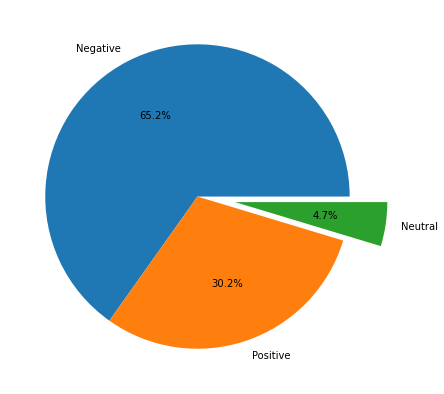

In [26]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, .25), autopct='%1.1f%%', shadow=False)
# plt.legend()

### Análisis de sentimiento usando SentiWordNet

In [27]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = dataset['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\gueva\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,Text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Ex Wife Threatening SuicideRecently I left my ...,Ex Wife Threatening SuicideRecently leave wi...,0.144444,Positive,-0.9521,Negative,Positive
1,i need helpjust help me im crying so hard,need helpjust help im cry hard,-0.291667,Negative,-0.2023,Negative,Negative
2,Honetly idkI dont know what im even doing here...,Honetly idkI dont know im even feel like not...,-0.155042,Negative,-0.9687,Negative,Negative
3,My life is over at 20 years oldHello all. I am...,life year oldHello year old balding male hai...,-0.004563,Negative,0.3104,Positive,Negative
4,Can you imagine getting old? Me neither.Wrinkl...,imagine get old neither Wrinkles weight gain...,-0.053864,Negative,-0.9021,Negative,Positive


In [28]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Negative    240
Positive    239
Neutral      34
0             1
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x19bac0e46a0>,
 [Text(0.1140897553440065, 1.0940674237566645, 'Negative'),
  Text(-0.3437529353099678, -1.04490856990733, 'Positive'),
  Text(1.3174516088598287, -0.29465447275181356, 'Neutral'),
  Text(1.0999794533226432, -0.006723263197220363, '0')],
 [Text(0.06223077564218536, 0.5967640493218169, '46.7%'),
  Text(-0.18750160107816424, -0.5699501290403617, '46.5%'),
  Text(0.8295065685413736, -0.18552318654743818, '6.6%'),
  Text(0.5999887927214417, -0.0036672344712111063, '0.2%')])

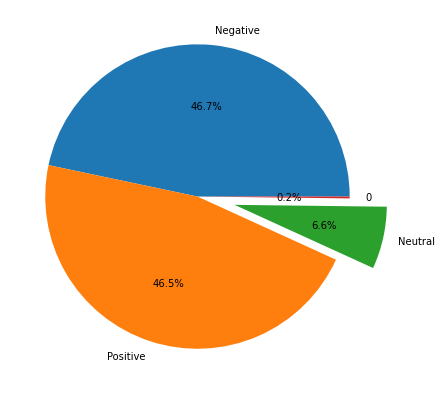

In [31]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25,0), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x19bac087610>,
 [Text(0.1140897553440065, 1.0940674237566645, 'Negative'),
  Text(-0.3437529353099678, -1.04490856990733, 'Positive'),
  Text(1.3174516088598287, -0.29465447275181356, 'Neutral'),
  Text(1.0999794533226432, -0.006723263197220363, '0')],
 [Text(0.06223077564218536, 0.5967640493218169, '46.7%'),
  Text(-0.18750160107816424, -0.5699501290403617, '46.5%'),
  Text(0.8295065685413736, -0.18552318654743818, '6.6%'),
  Text(0.5999887927214417, -0.0036672344712111063, '0.2%')])

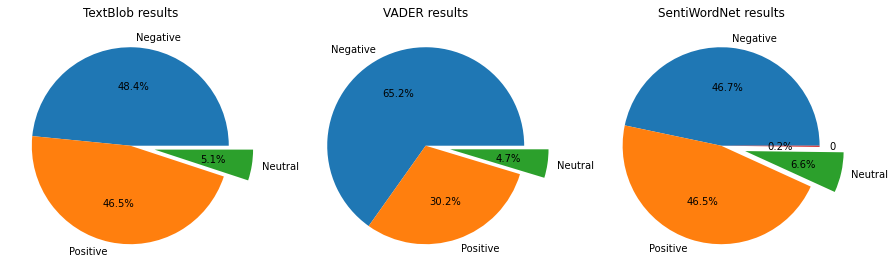

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25,0), autopct='%1.1f%%', shadow=False)